# PyDEns (Python Neural PDE Solver Package) Introduction w/ Examples
## Author: Josh Dey
## Version: 1.0

### Link to Pydens Github Repo: https://github.com/analysiscenter/pydens

#### Versioning:
* Python: v3.7.9
* Pydens: v0.1.2
* Tensorflow: v1.14.0
* Numpy: v1.19.1
* Matplotlib: v3.3.2

In [1]:
import os
import sys

# Stop TF from showing unnecessary deprecation warnings
import warnings
warnings.filterwarnings('ignore')
from tensorflow import logging
logging.set_verbosity(logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import tensorflow as tf
#from tensorflow.python.framework.ops import disable_eager_execution
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

#disable_eager_execution()
#tf.executing_eagerly()

from pydens import Solver, NumpySampler, cart_prod, add_tokens
from pydens import plot_loss, plot_pair_1d, plot_2d, plot_sections_2d, plot_sections_3d

In [2]:
add_tokens() #prevents clutter from tf.sin, tf.cos, tf.exp, etc.. to just sin, cos, exp, ...

AttributeError: module 'tensorflow' has no attribute 'math'

# Poisson's Equation (in R<sup>2</sup>): $\Delta$ $\Psi(x,y) = f(x,y)$

To set this up, we describe Poission's Equation in a dictionary with the number of dimensions, the form the PDE takes, and the boundary condition:

In [ ]:
pde = {
    'n_dims': 2,
    'form': lambda u, x, y: D(D(u, x), x) + D(D(u, y), y) - 5 * sin(np.pi * (x + y)),
    'boundary_condition': 1
}  

In [ ]:
config = {
    'pde': pde,
    'track': {'d2x+d2y': lambda u, x, y: D(D(u, x), x) + D(D(u, y), y)}
}

In [ ]:
s = NumpySampler('u', dim=2)

In [ ]:
s

In [ ]:
dg = Solver(config)
#tf.executing_eagerly()
dg.fit(batch_size=100, sampler=s, n_iters=1500, bar='notebook')

In [18]:
!pwd

/home/user3/josh/neuralPDE/PyDENS


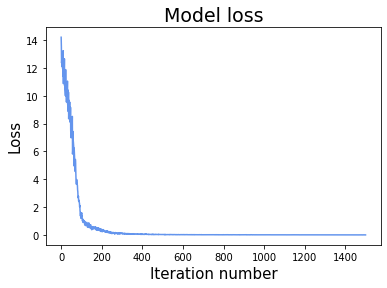

In [8]:
plot_loss(dg.loss, color='cornflowerblue')

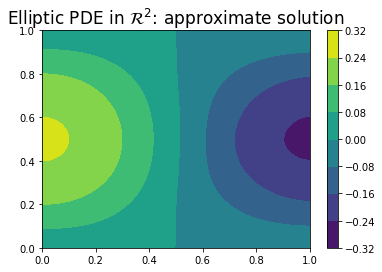

In [16]:
plot_2d(dg, fetches='solution', mode='contourf')

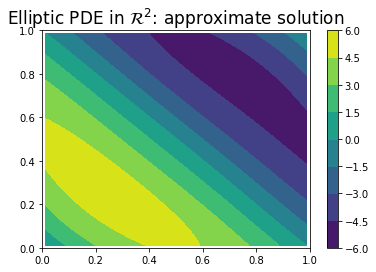

In [10]:
plot_2d(dg, fetches='d2x+d2y', mode='contourf')

# Wave Equation (in R x R): $\frac{\partial u}{\partial t} (x,0) = 0$

In [11]:
# describing pde-problem in pde-dict
pde = {
    'n_dims': 2,
    'form': lambda u, x, t: D(D(u, t), t) - D(D(u, x), x),
    'initial_condition': [lambda x: x * (1 - x), 0],
    'time_multiplier': 'polynomial'
}

# change default network architecture
body = {
    'layout': 'faR fa fa+ f',
    'units': [20, 45, 20, 1],
    'activation': tf.nn.tanh
}

# put it together in model-config
config = {
    'body': body,
    'pde': pde,
    'track': {'dt': lambda u, x, t: D(u, t)}
}

# uniform spatial sampling and exponential time-sampling
s = NumpySampler('u') & NumpySampler('e', scale=1).truncate(3.0)

In [12]:
# train the network on batches of 100 points
dg = Solver(config)
dg.fit(batch_size=150, sampler=s, n_iters=10000, bar='notebook')

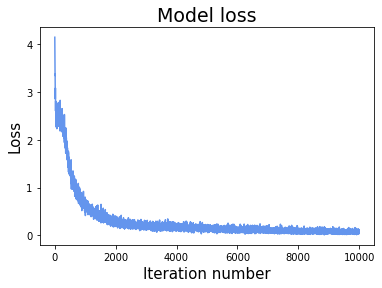

In [13]:
plot_loss(dg.loss, color='cornflowerblue')

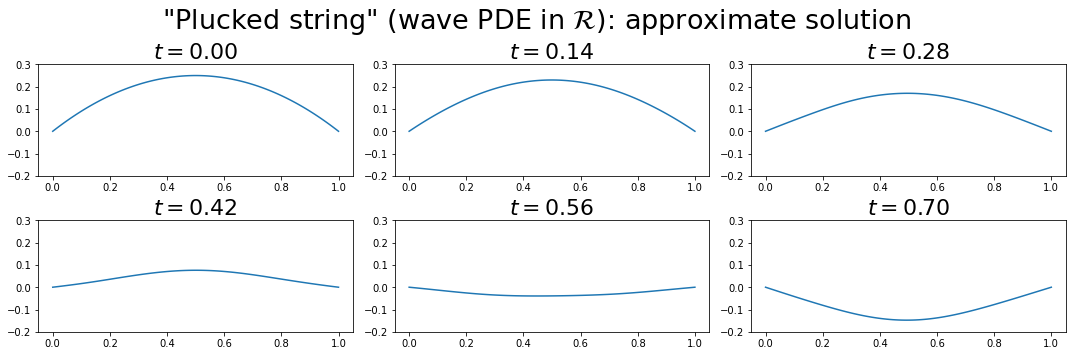

In [14]:
# plot network approximation of a solution
timestamps = (0., 0.14, 0.28, 0.42, 0.56, 0.7)
plot_sections_2d(model=dg,
                 timestamps=timestamps, grid_size=(2, 3), ylim=(-0.2, 0.3),
                 title='"Plucked string" (wave PDE in $\mathcal{R}$): approximate solution')